Auther Name:        Muhammad Saeed
-
- Github profile:     https://github.com/Saeed-Engr
- Linkedin Profile:   https://www.linkedin.com/in/saeedengr

Project Description
-
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

 The data has missing values as some stores do not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

# 1).Problem Statement

Bigmart have collected 2013 sales data for 1559 products across 10 stores in different cities. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

# 2).Hypothesis Generation

## **2. Hypothesis generation with respect to problem statement.**

1. Item weight might effect a sales of the product.
2. Sales of the product may be depends on the items fat content.
3. More Item_Visibility of a particular product may be costlier than other products.
4. Item type could have an effect on the sales.
5. Are the items with more MRP have more item outlet sales.
6. Are the stores which have established earlier have more sales.
7. Size of the stores could have an effect on the item sales at a particular store.
8. Location of the stores might depends on the Item outlet sales.
9. Are the supermarkets have more sales than others.


# 3).Loading Packages and Data

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter


#ploting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

In [168]:
train = pd.read_csv("E:/Technocolabs Internship/1st mini project/Train.csv")
test = pd.read_csv("E:/Technocolabs Internship/1st mini project/Test.csv")
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [169]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [170]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


### **Observations:**
* This shows that the train and test data is imported successfully.
* The train data consists of 8,523 training examples with 12 features.
* The test data consists of 5,681 training examples with 11 features


# 4).Data Structure and Content

In [171]:
print(train.ndim)
print(test.ndim)

2
2


In [172]:
print(train.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [173]:
print(test.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


In [174]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [175]:
cat_features = [feature for feature in train.columns if train[feature].dtypes == 'O']
print('Number of categorical variables: ', len(cat_features))
print('*'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  7
********************************************************************************
Categorical variables column name: ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [176]:
numerical_features = [feature for feature in train.columns if train[feature].dtypes != 'O']
print('Number of numerical variables: ', len(numerical_features))
print('*'*80)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  5
********************************************************************************
Numerical Variables Column:  ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


Numerical Features:
-
* Item_Weight
* Item_Visibility
* Item_MRP
* Outlet_Establishment_Year
* Item_Outlet_Sales(Target Variable)

### **Categorical Features**
* Item_Identifier
* Item_Fat_Content(Ordinal Feature)
* Item_Type
* Outlet_Itemtifier
* Outlet_Size(Ordinal Feature)
* Outlet__Location_Type(Ordinal Feature)
* Ootlet_Type(Ordinal Feature)

**Observations:**
* There are 4 float type variables, 1 integer type and 7 object type.
* We are considering Item_Establishment_Year as a categorical feature because it contains some fixed value but not converting its data type now will consider later.
* Item_Fat_Content, Outlet_Size, Outelet_Location_Type and Outlet_Type are ordinal features because these values can be arranged in some order.



# 5).Exploratory Data Analysis

In [177]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [178]:
train.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [179]:
val = train.isnull().sum()
val

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [180]:
total_cells = np.product(train.shape)
total_cells

102276

In [181]:
train.shape

(8523, 12)

In [182]:
8523*12

102276

In [183]:
#percent of data that is missing

# how many total missing values do we have?
total_cells = np.product(train.shape)
total_missing = val.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

3.786812155344362


In [184]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [185]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [186]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [187]:
train.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [188]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [189]:
train.duplicated().sum()

0

In [190]:
train['Item_Outlet_Sales'].nunique()

3493

In [191]:
train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5201,FDC34,16.00,Regular,0.173109,Snack Foods,155.2972,OUT045,2002,NaN,Tier 2,Supermarket Type1,3894.9300
5077,DRC01,5.92,Regular,0.019200,Soft Drinks,47.7692,OUT046,1997,Small,Tier 1,Supermarket Type1,492.6920
5463,FDW55,12.60,Regular,0.000000,Fruits and Vegetables,248.8092,OUT035,2004,Small,Tier 2,Supermarket Type1,6723.2484
7887,NCP43,NaN,Low Fat,0.053414,Others,181.7660,OUT019,1985,Small,Tier 1,Grocery Store,179.7660
3160,NCP50,NaN,Low Fat,0.020460,Others,81.7618,OUT027,1985,Medium,Tier 3,Supermarket Type3,2175.1686


In [192]:
train["Item_Fat_Content"].nunique()

5

In [193]:
train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [194]:
train["Item_Type"].nunique()

16

In [195]:
train["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

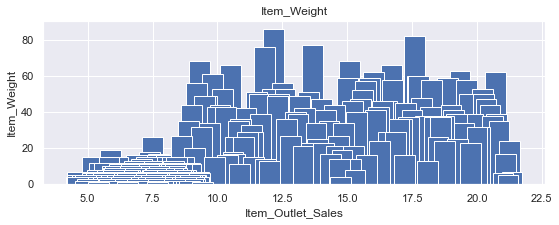

Item_Weight: 
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64


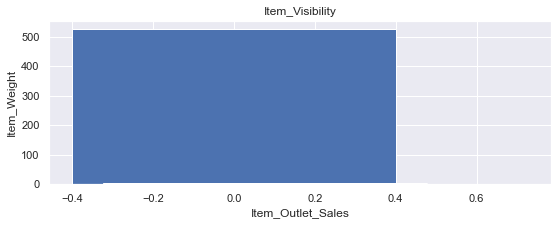

Item_Visibility: 
 0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64


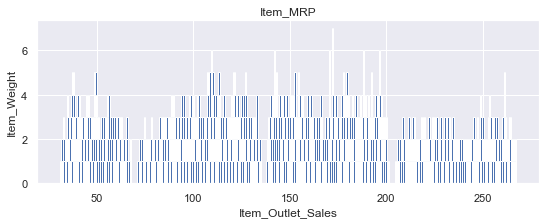

Item_MRP: 
 172.0422    7
170.5422    6
196.5084    6
188.1872    6
142.0154    6
           ..
97.3384     1
83.1934     1
96.6752     1
152.6682    1
75.4670     1
Name: Item_MRP, Length: 5938, dtype: int64


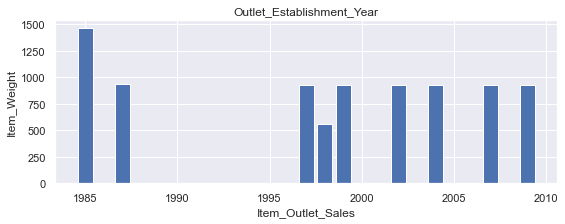

Outlet_Establishment_Year: 
 1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


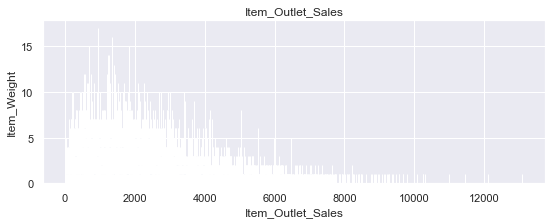

Item_Outlet_Sales: 
 958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64


In [196]:
def bar_plot(variable):
    
    var=train[variable]
    var_Value=var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_Value.index,var_Value.values)
    
    plt.xlabel("Item_Outlet_Sales")
    plt.ylabel("Item_Weight")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

###########################################    

for val in numerical_features:
    bar_plot(val)

In [197]:
#category2=["Gender", "Customer Type", "Type of Travel", "Class","Satisfaction"]

for c in cat_features:
    print("{} \n".format(train[c].value_counts()))

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64 

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64 

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64 

Mediu

In [198]:
train.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

Firstly we need to split our data to categorical and numerical data,

using the .select_dtypes('dtype').columns.to_list() combination.

In [199]:
#list of all the numeric columns
num = train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = train.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  train[num]
#categoric df
BM_cat = train[cat]

#print(num)
#print(cat)

[train[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    2793
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

In [200]:
#train
train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], 
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

#check result
train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [201]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


`Outlet_Establishment_Year` is quite useless as it is, making a new column with the age the new name will be `Outlet_Age`

In [202]:
#creating our new column for train datasets
train['Outlet_Age']= train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)
##uncomment to check result
#tr_df['Outlet_Age'].head
#te_df['Outlet_Age'].head

In [203]:
train.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,21
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,11


# Data Visualization

Univariate Plots
-
For starters we will create countplots for the categorical columns:

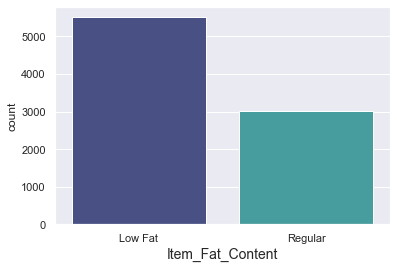

In [204]:
#categorical columns:
['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 
 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
 
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=train ,palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

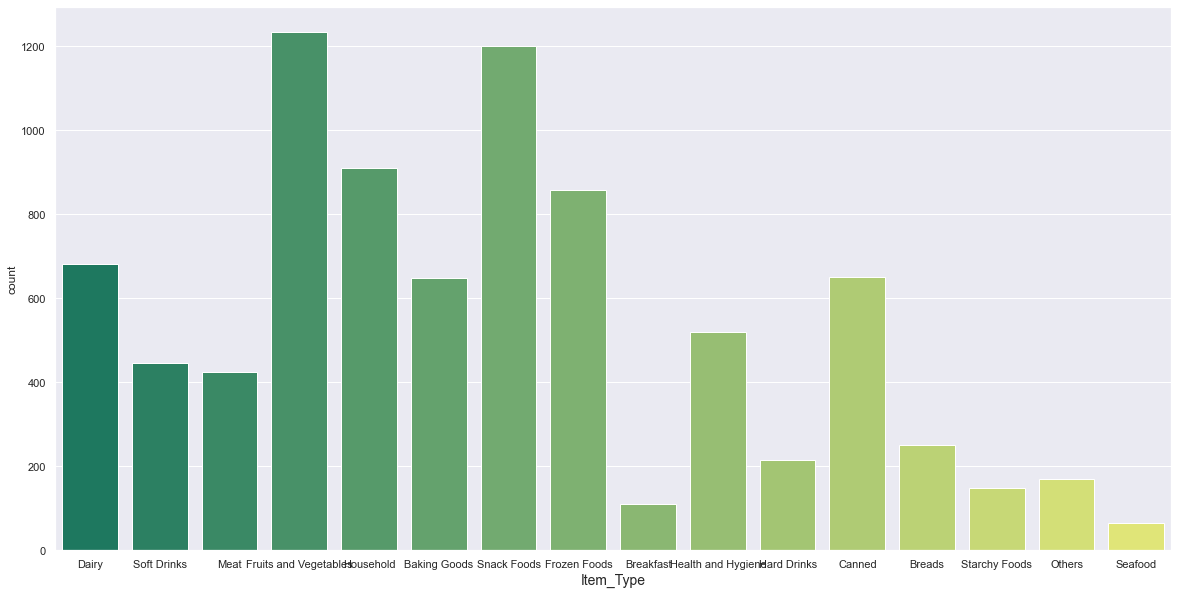

In [205]:
plt.figure(figsize=(20,10))
sns.countplot(x='Item_Type' , data=train ,palette='summer')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

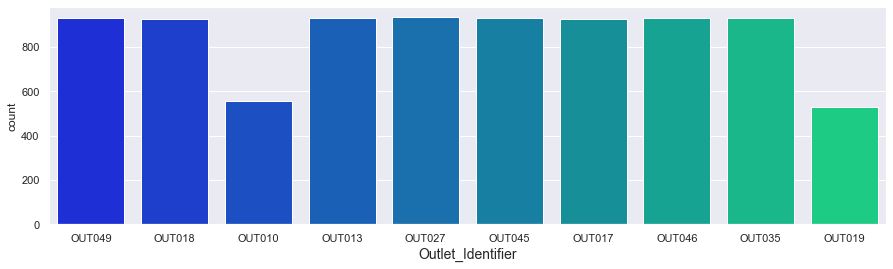

In [206]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=train ,palette='winter')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

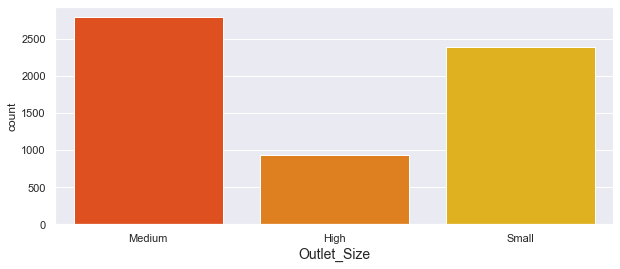

In [207]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=train ,palette='autumn')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

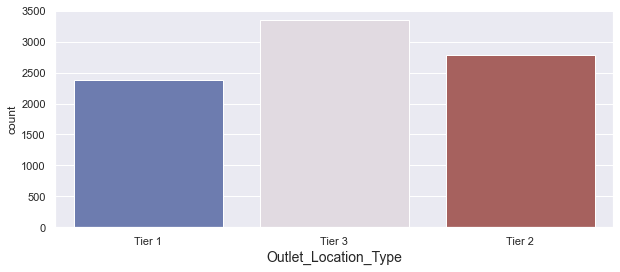

In [208]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=train ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

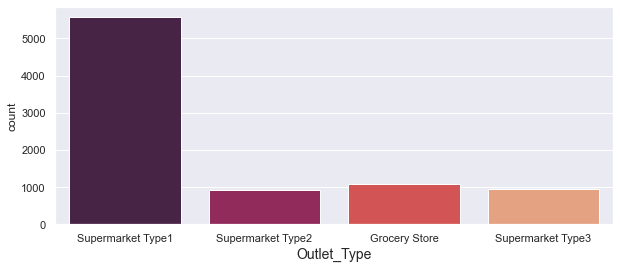

In [209]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=train ,palette='rocket')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

Categoric columns realizations
-
* `Item_Fat_Content` - Most items sold are low fat.
* `Item_Type` - Item types that are distictly popular are `fruits and vegetables` and `snack foods`. 
* `Outlet_Identifier` - Sold items are ditributed evenly among outlets excluding `OUT010` and `OUT019` that are significanly lower. 
* `Outlet_Size` - Bigmart outlets are mostly medium sized in our data. 
* `Outlet_Location_Type` - The most common type is `Tier3`.
* `Outlet_Type` - By a wide margin the mode outlet type is `Supermarket Type1`.

Now for the numerical columns:
-


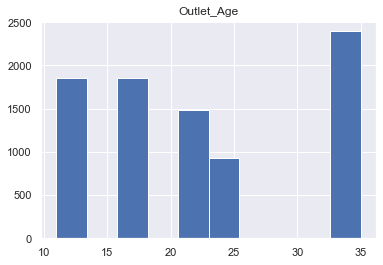

In [210]:
#list of all the numeric columns
num = train.select_dtypes('number').columns.to_list()
#numeric df
BM_num =  train[num]

plt.hist(train['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

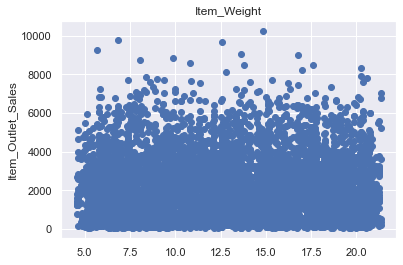

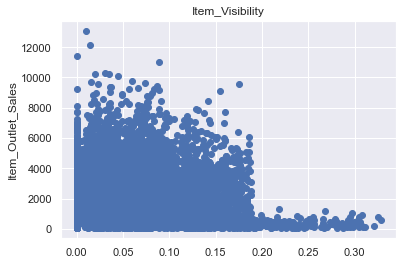

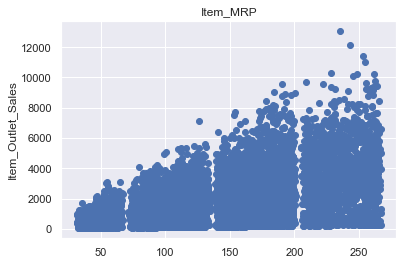

In [211]:
#because of the variability of the unique values of the numeric columns a scatter plot with the target value will be of use
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

 multivariate plots
-
I want to check the following relationships with `Item_Outlet_Sales`:
* Sales per item type
* Sales per outlet
* Sales per outlet type
* Sales per outlet size
* Sales per location type

No handles with labels found to put in legend.


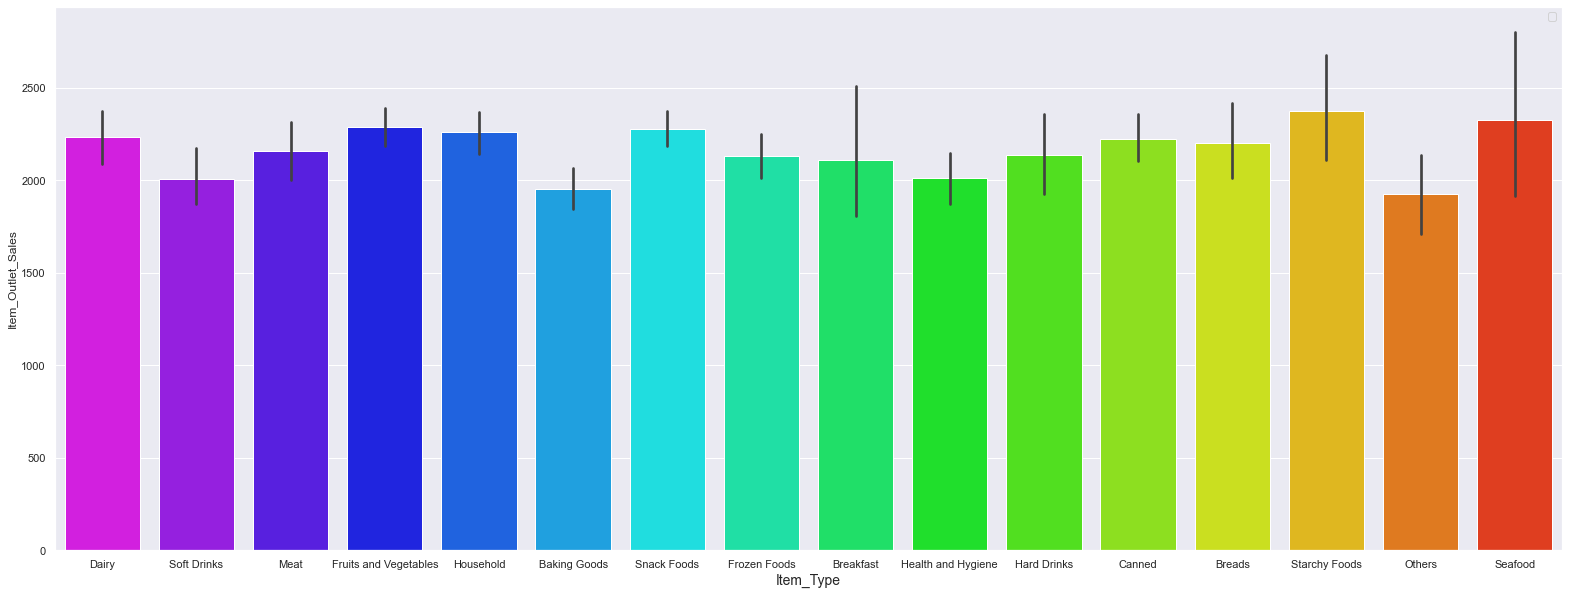

In [212]:
plt.figure(figsize=(27,10))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=train ,palette='gist_rainbow_r')
plt.xlabel('Item_Type', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


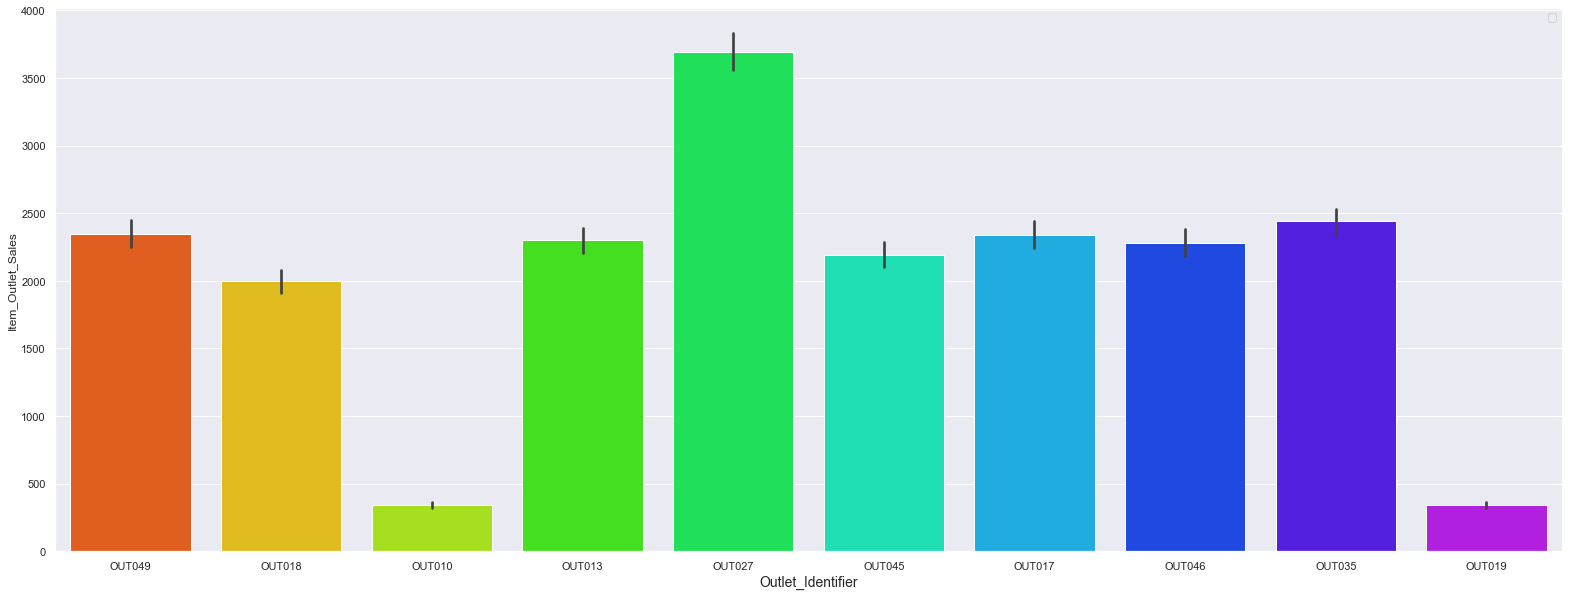

In [213]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=train ,palette='gist_rainbow')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


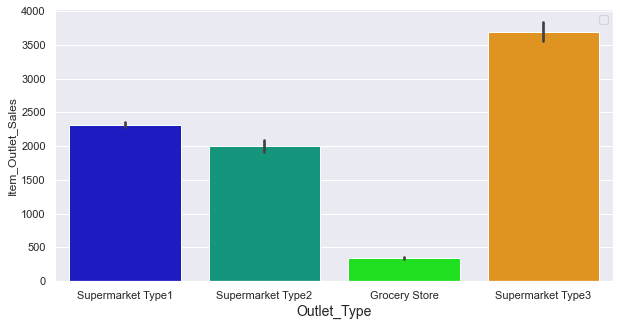

In [214]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=train ,palette='nipy_spectral')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


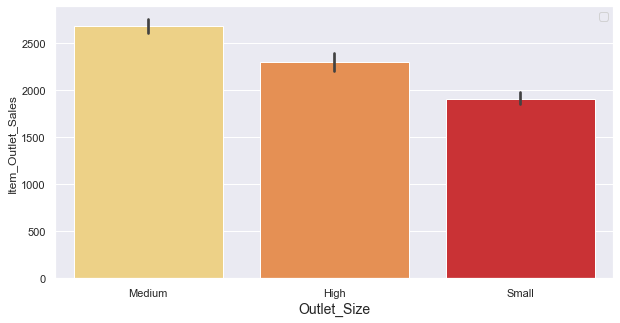

In [215]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=train ,palette='YlOrRd')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

No handles with labels found to put in legend.


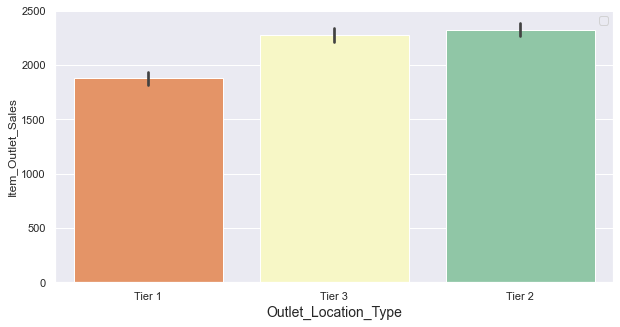

In [216]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=train ,palette='Spectral')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

Realizations:
-
* The difference in item types by sales is very small.
* Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.
* Suprisingly supermarket type 3 is the most profitable and not type 1.
* Medium and high outlet sizes are pretty much even in sales.
* Tier 2 and 3 are almost even being the highest in sales (2 is slightly larger). 

# correlation matrix

<AxesSubplot:>

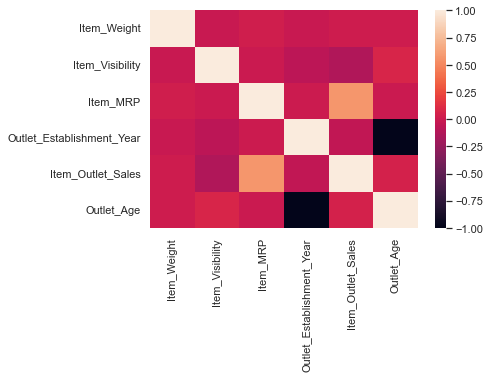

In [217]:
#plotting the correlation matrix
sns.heatmap(train.corr() ,cmap='rocket')

# Missing Values

<AxesSubplot:>

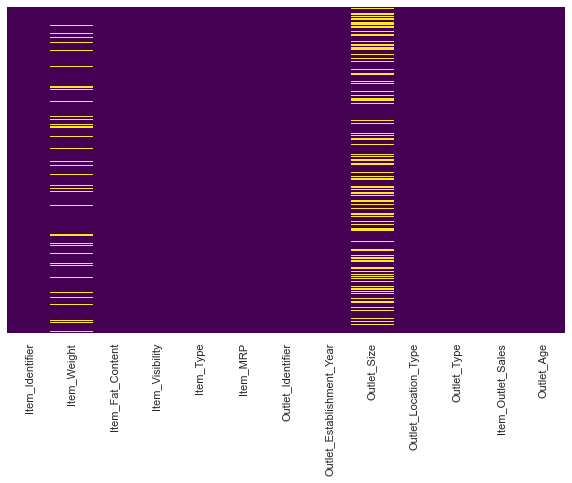

In [218]:
plt.figure(figsize = (10,6))
sns.heatmap(train.isnull(), yticklabels=False,cbar = False,cmap ='viridis')

### **Observation:**
* Yes our dataset contain missing values.
* Item_weight and Outlet_Size features contain missing values

* **Let's calculate the percentage of missing values**

In [219]:
def missing_percent():
  miss_item_weight = (train['Item_Weight'].isnull().sum()/len(train))*100
  miss_Outlet_Size = (train['Outlet_Size'].isnull().sum()/len(train))*100

  print('% of missing values in Item_Weight: ' + str(miss_item_weight))
  print('% of missing values in Outlet_Size: ' +str(miss_Outlet_Size))

In [220]:
missing_percent()

% of missing values in Item_Weight: 17.165317376510618
% of missing values in Outlet_Size: 28.27642848762173


### **Observations:**
* Since the percentage of missing values is very high so we can't drop these values otherwise we can miss some important information. Only way is to handle the missing values using some technique.

### **Things to invetigate:**
* Do the missing values of Item weight have some relation with sales of the items or any other feature.
* Do the missing values of Outlet size have some relation with any other feature.


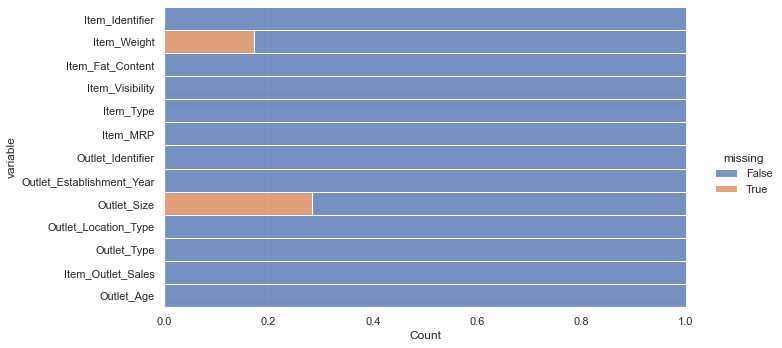

In [221]:
sns.displot(
    data=train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

Fill Nan Values with median
-


In [222]:
train["Item_Weight"]=train["Item_Weight"].fillna(train["Item_Weight"].mean())

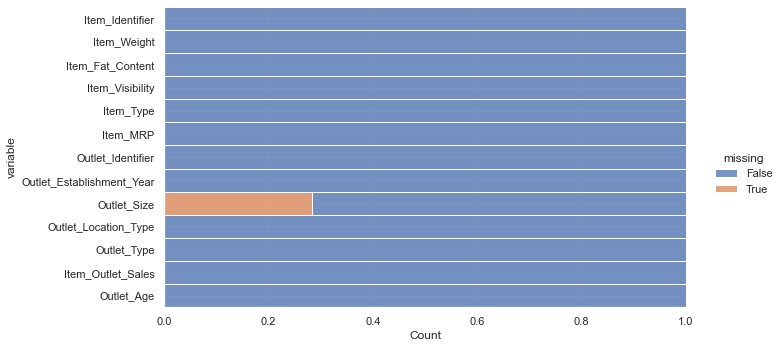

In [223]:
sns.displot(
    data=train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

Outlet_Size
-
`Outlet_Size` is a categorical column, therefore we will impute missing values with `Medium` the **mode value**

In [224]:
print("train mode", [train['Outlet_Size'].mode().values[0]])
       

train mode ['Medium']


In [225]:
#train
train['Outlet_Size'] = train['Outlet_Size'].fillna(
train['Outlet_Size'].dropna().mode().values[0])

#checking if we filled missing values
train['Outlet_Size'].isnull().sum()

0

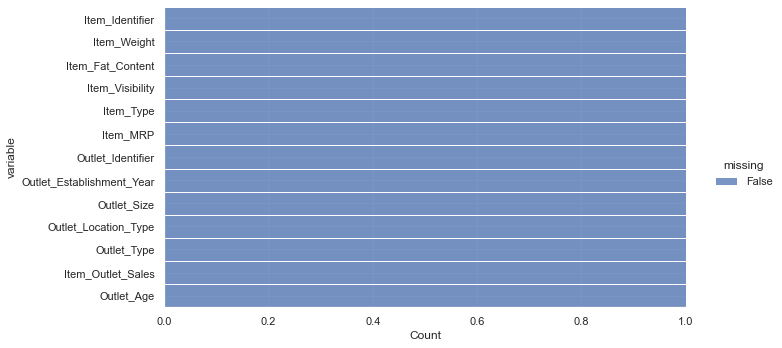

In [226]:
sns.displot(
    data=train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=2
)

Text(0.5, 1.0, 'Item_Weight Boxplot')

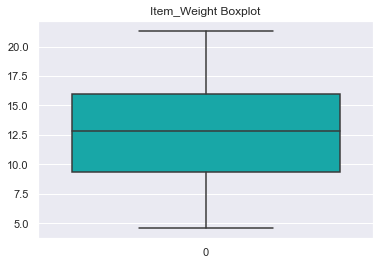

In [227]:
# I personally prefer a vertical view and a cyan color
sns.boxplot(data=train['Item_Weight'],orient="v", color = 'c')
plt.title("Item_Weight Boxplot")

In [228]:
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Outlet_Age                   0
dtype: int64

# Feature Engineering


### Feature Engineering

**Categorical values**:

We have 7 columns we need to delete or encode.

* Ordinal variables:
    * `Item_Fat_Content`  
    * `Outlet_Size`  
    * `Outlet_Location_Type`
    
* Nominal variables:
    * `Item_Identifier `  
    * `Item_Type`
    * `Outlet_Identifier`
    * `Outlet_Type`

**Numeric values**:

* From the numeric variables `Outlet_Establishment_Year` is no longer needed

**Conclusion:**

In my FE process i have decided:

1. The columns `Outlet_Establishment_Year`, `Item_Identifier ` and `Outlet_Identifier` don't have significant values so we will drop them.
2. All Ordinal variables will be Label encoded.
3. The columns `Outlet_Type` and `Item_Type`  will be One Hot encoded.



In [251]:
# Dropping irrelevant columns

train  = train.drop(['Item_Identifier'],axis=1)

#te_fe = te_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [255]:
train_data_num = train.select_dtypes("float64")
train_data_cat = train.select_dtypes("object")


In [256]:
train_data_num.head(2)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.30,0.016047,249.8092,3735.1380
1,5.92,0.019278,48.2692,443.4228


In [257]:
train_data_cat.head(2)

,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2


In [258]:
train_data_cat.shape

(8523, 6)

# Categorical encoding

Dropping Irrelevant Columns
-


In [260]:
train_data_cata_encoded=pd.get_dummies(train_data_cat, columns=train_data_cat.columns.to_list())
train_data_cata_encoded.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


# Concatenate Data

In [261]:
data=pd.concat([train_data_cata_encoded,train_data_num],axis=1,join="outer")
data.head()

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,9.30,0.016047,249.8092,3735.1380
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,5.92,0.019278,48.2692,443.4228
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,17.50,0.016760,141.6180,2097.2700
3,0,1,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,19.20,0.000000,182.0950,732.3800
4,1,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,8.93,0.000000,53.8614,994.7052


In [262]:
data.columns

Index(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Groce

# Buid Models

In [264]:
data.shape

(8523, 42)

In [268]:
y = data['Item_Outlet_Sales']
x = data.drop('Item_Outlet_Sales', axis = 1)

In [269]:
print(x.shape)
print(y.shape)

(8523, 41)
(8523,)


In [270]:
x.head(2)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP
0,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,1,0,0,9.30,0.016047,249.8092
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,5.92,0.019278,48.2692


In [272]:
y.head(5)

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [274]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

# Linear Regression

In [281]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Linear Regression

![](https://cdn.filestackcontent.com/WCbMsxiSLW2H1SyqunQm)

In statistics, linear regression is a linear approach to modelling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables).

Linear regression was the first type of regression analysis to be studied rigorously, and to be used extensively in practical applications. This is because models which depend linearly on their unknown parameters are easier to fit than models which are non-linearly related to their parameters and because the statistical properties of the resulting estimators are easier to determine.


In [282]:
#model
LR = LinearRegression(normalize=True)

#fit
LR.fit(X_train, y_train)

#predict
y_predict = LR.predict(X_test)

#score variables
LR_MAE = round(MAE(y_test, y_predict),2)
LR_MSE = round(MSE(y_test, y_predict),2)
LR_R_2 = round(R2(y_test, y_predict),4)
LR_CS  = round(CVS(LR, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(LR,LinearRegression(),X,y,5)

 Mean Absolute Error: 861.71

 Mean Squared Error: 1333256.85

 R^2 Score: 0.5622

LinearRegression(normalize=True) Scores:
0.57
0.55
0.55
0.56
0.56
Average LinearRegression(normalize=True) score: 0.5589


In [283]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Linear_Regression.head()

,y_test,prediction
4931,1426.1436,2440.0
4148,1201.7690,2508.0
7423,1836.2764,2192.0
4836,2410.8618,2412.0
944,1549.9824,3032.0


In [284]:
def evaluate(y_test,y_predict):
    print("MAE ",metrics.mean_absolute_error(y_predict,y_test))
    print("MSE",metrics.mean_squared_error(y_predict,y_test))
    print("RMSE ",np.sqrt(metrics.mean_squared_error(y_predict,y_test)))

In [288]:
lr = LinearRegression().fit(X_train, y_train)
accuracy = lr.score(X_train, y_train)
print(accuracy)

###########################

y_predict=lr.predict(X_test)
evaluate(y_test,y_predict)

0.5633974724933987
MAE  861.3310520668505
MSE 1331589.9630848635
RMSE  1153.9453899924656


## Random Forest Regressor

![](https://lh3.googleusercontent.com/proxy/V_3AWj1s3kBvrcJEUczXaoNlIVmToUBGxo_wuNSM2B3NNUs1q31KuEETmfxw3jIfiJ5H3SkjTCs9rq8BOgRZnP-ZIZBjLwVMRMchhNeV0SJQknEdTd4dhjrULXqViViMORUPWvoGMQuGYol-sj5lIEXKuHo4ouNxp3-m-sOUkzDbZ10Ph-a769ugPqsTLvJLlfhr0sbSz6Y0=s0-d)

Random forest is a Supervised Learning algorithm which uses ensemble learning method for classification and regression.
It operates by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [291]:
#model
RFR= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)
#fit
RFR.fit(X_train, y_train)
#predict
y_predict = RFR.predict(X_test)

#score variables
RFR_MAE = round(MAE(y_test, y_predict),2)
RFR_MSE = round(MSE(y_test, y_predict),2)
RFR_R_2 = round(R2(y_test, y_predict),4)
RFR_CS  = round(CVS(RFR, X, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(RFR,RandomForestRegressor(),X,y,5)


 Mean Absolute Error: 792.3

 Mean Squared Error: 1252962.71

 R^2 Score: 0.5885

RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) Scores:
0.57
0.54
0.53
0.57
0.57
Average RandomForestRegressor(max_depth=5, min_samples_leaf=100, n_estimators=200,
                      n_jobs=4, random_state=101) score: 0.5546


In [292]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.head()

,y_test,prediction
4931,1426.1436,2552.828253
4148,1201.7690,1284.164499
7423,1836.2764,2113.039325
4836,2410.8618,2155.194642
944,1549.9824,2979.971868


In [293]:
from sklearn.ensemble import RandomForestRegressor

random_cl = RandomForestRegressor(n_estimators=500)
random_cl=random_cl.fit(X_train,y_train)
print(random_cl)

#######################
y_predict=random_cl.predict( X_test)
evaluate(y_predict,y_test)

RandomForestRegressor(n_estimators=500)
MAE  819.5774450554558
MSE 1331346.6054327341
RMSE  1153.8399392605259


# xgboost

In [294]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_r = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 100, seed = 123)

# Fitting the model
xgb_r=xgb_r.fit(X_train, y_train)
 

[12:48:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [295]:
# Predict the model
y_predict = xgb_r.predict(X_test)
evaluate(y_test,y_predict)

MAE  848.1337498781901
MSE 1434463.2674674913
RMSE  1197.6908062882887


## Lasso Regressor

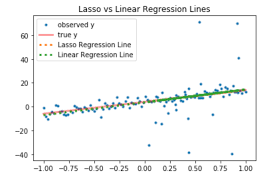

In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces  - more info on [wikipedia.](https://en.wikipedia.org/wiki/Lasso_(statistics)) 


In [296]:
#model
LS = Lasso(alpha = 0.05)
#fit
LS.fit(X_train,y_train)

#predict
y_predict = LS.predict(X_test)

#score variables
LS_MAE = round(MAE(y_test, y_predict),2)
LS_MSE = round(MSE(y_test, y_predict),2)
LS_R_2 = round(R2(y_test, y_predict),4)
LS_CS  = round(CVS(LS, X, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(LS,Lasso(alpha = 0.05),X,y,5)

 Mean Absolute Error: 861.29

 Mean Squared Error: 1331529.92

 R^2 Score: 0.5627

Lasso(alpha=0.05) Scores:
0.57
0.55
0.55
0.56
0.56
Average Lasso(alpha=0.05) score: 0.559


# Conclusion

In [297]:
MAE= [LR_MAE,RFR_MAE,LS_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS]

Models = pd.DataFrame({
    'models': ["Linear Regression","Random Forest Regressor","Lasso Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

,models,MAE,MSE,R^2,Cross Validation Score
1,Random Forest Regressor,792.30,1252962.71,0.5885,0.5914
2,Lasso Regressor,861.29,1331529.92,0.5627,0.5590
0,Linear Regression,861.71,1333256.85,0.5622,0.5586


## Summary

* `Item_MRP`  optimizes Maximum Outlet sales (positive correlation with the target).
* Linear Regression	and Lasso Regressor have the best perfomance in most categories.
* only a third of the observed variation can be explained by the model's inputs of Random Forest Regressor, there for it's performance is not optimal even though his cross validation is the highest.
* For better peformance this models need tuning e.g. Grid Search.